In [1]:
import pickle
import pandas as pd
import seaborn as sns

from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

In [3]:
attn_file = 'example_attn.pkl'

with open(attn_file, 'rb') as f:
    attn = pickle.load(f)
print(attn.shape)

torch.Size([16, 41, 41])


In [4]:
head_number = 12

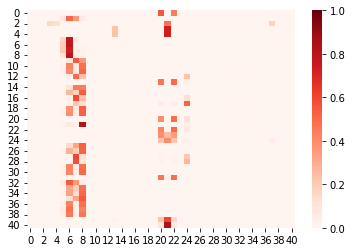

In [5]:
sns.heatmap(attn[head_number], cmap='Reds', vmin=0, vmax=1);

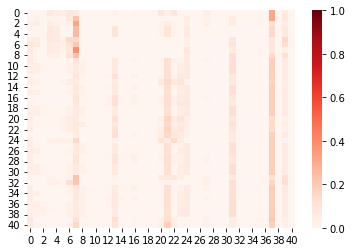

In [6]:
sns.heatmap(attn.mean(axis=0), cmap='Reds', vmin=0, vmax=1);

In [7]:
smiles = 'CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3NC4=CC(=C(C=C4)OCC5=CC(=CC=C5)F)Cl'
mol = Chem.MolFromSmiles(smiles)

In [8]:
Reds_cmap = cm.get_cmap('bwr', 3)
colorMap = LinearSegmentedColormap.from_list(
            'Reds', [Reds_cmap(1), (1.0, 1.0, 1.0), Reds_cmap(2)], N=255)

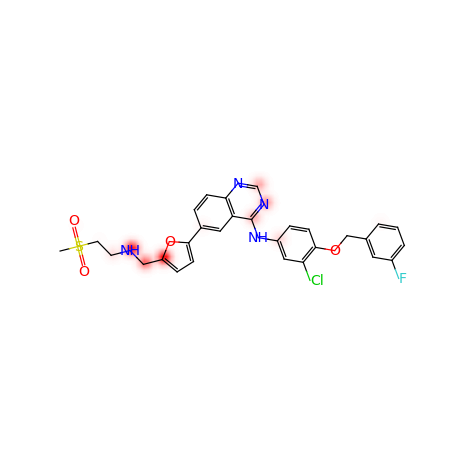

In [10]:
d = Draw.MolDraw2DCairo(400,400)
SimilarityMaps.GetSimilarityMapFromWeights(
            mol, attn[head_number].mean(axis=0).tolist(),
            colorMap=colorMap, contourLines=None)
d.FinishDrawing()

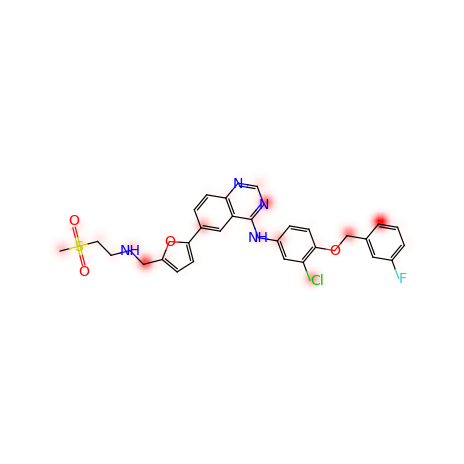

In [11]:
d = Draw.MolDraw2DCairo(400,400)
SimilarityMaps.GetSimilarityMapFromWeights(
            mol, attn.mean(axis=0).mean(axis=0).tolist(),
            colorMap=colorMap, contourLines=None)
d.FinishDrawing()